In [ ]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestNeighbors
import zipfile

import gc
import os
from os.path import isfile, join
import sys
import time
import warnings
import pandas as pd

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'white'

In [ ]:
# prompt: Add some common values/physical constants in the CGS units like kpc, Msun, and cosmic constants

# Physical constants in CGS units
kpc = 3.086e18 # cm
Msun = 1.989e33 # g
G = 6.674e-8 # cm^3 g^-1 s^-2
#h = 0.6766 # hubble constants in unit of 100 km/s/Mpc
#cosmo = Cosmology(H0=H0, Omega0=0.308, OmegaLambda=0.692, neutrino_hierarchy='normal')

## Add these values to the global namespace
#globals().update({'kpc': kpc, 'Msun': Msun, 'G': G, 'H0': H0, 'cosmo': cosmo})

generate = False #flag to determing whether we want generate dataset or not
# False: read the data and do post processing; True: generate raw dataset for training


In [ ]:
h=0.6774


z_list=[20.05, 14.99, 11.98, 10.98, 10.00, 9.39, 9.00, 8.45, 8.01, 7.60, 7.24, 7.01, 6.49, 6.01, 5.85, 5.53, 5.23, 5.00, 4.66, 4.43, 4.18, 4.01, 3.71, 3.49, 3.28, 3.01, 2.90, 2.73, 2.58, 2.44,\
   2.32, 2.21, 2.10, 2.00, 1.90, 1.82, 1.74, 1.67, 1.60, 1.53, 1.50, 1.41, 1.36, 1.30, 1.25, 1.21, 1.15, 1.11, 1.07, 1.04, 1.00, 0.95, 0.92, 0.89, 0.85, 0.82, 0.79, 0.76, 0.73, 0.70, 0.68,\
   0.64, 0.62, 0.60, 0.58, 0.55, 0.52, 0.50, 0.48, 0.46, 0.44, 0.42, 0.40, 0.38, 0.36, 0.35, 0.33, 0.31, 0.30, 0.27, 0.26, 0.24, 0.23, 0.21, 0.20, 0.18, 0.17, 0.15, 0.14, 0.13, 0.11, 0.10,
   0.08, 0.07, 0.06, 0.05, 0.03, 0.02, 0.01, 0.00]
t_list=[0.129, 0.271, 0.370, 0.418, 0.475, 0.517, 0.547, 0.596, 0.640, 0.687, 0.732, 0.764, 0.844, 0.932, 0.965, 1.036, 1.112, 1.177, 1.282, 1.366, 1.466, 1.540, 1.689, 1.812, 1.944, 2.145,\
   2.238, 2.384, 2.539, 2.686, 2.839, 2.981, 3.129, 3.285, 3.447, 3.593, 3.744, 3.902, 4.038, 4.206, 4.293, 4.502, 4.657, 4.816, 4.980, 5.115, 5.289, 5.431, 5.577, 5.726, 5.878, 6.073,\
   6.193, 6.356, 6.522, 6.692, 6.822, 6.998, 7.132, 7.314, 7.453, 7.642, 7.786, 7.932, 8.079, 8.280, 8.432, 8.587, 8.743, 8.902, 9.062, 9.225, 9.389, 9.556, 9.724, 9.837, 10.009, 10.182,\
   10.299, 10.535, 10.654, 10.834, 11.016, 11.138, 11.323, 11.509, 11.635, 11.824, 11.951, 12.143, 12.337, 12.467, 12.663, 12.795, 12.993, 13.127, 13.328, 13.463, 13.667, 13.803]

In [ ]:
z_list.index(2.58)

28

In [ ]:
!pwd

/content


In [ ]:
# prompt: allow me to read content in drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: read the directory within the halodata.zip, and find the correct file within in the zipfile

import zipfile

rep = '/content/drive/MyDrive/BHData/halodata.zip'

with zipfile.ZipFile(rep, 'r') as zip_ref:
    # Get a list of all files in the zip archive
    file_names = zip_ref.namelist()
    print(file_names)
    # Find the file you want


['halodata_tng100-1_0th.npy', 'halodata_tng100-1_10th.npy', 'halodata_tng100-1_11th.npy', 'halodata_tng100-1_12th.npy', 'halodata_tng100-1_13th.npy', 'halodata_tng100-1_14th.npy', 'halodata_tng100-1_15th.npy', 'halodata_tng100-1_16th.npy', 'halodata_tng100-1_17th.npy', 'halodata_tng100-1_18th.npy', 'halodata_tng100-1_19th.npy', 'halodata_tng100-1_1th.npy', 'halodata_tng100-1_20th.npy', 'halodata_tng100-1_21th.npy', 'halodata_tng100-1_22th.npy', 'halodata_tng100-1_23th.npy', 'halodata_tng100-1_24th.npy', 'halodata_tng100-1_25th.npy', 'halodata_tng100-1_26th.npy', 'halodata_tng100-1_27th.npy', 'halodata_tng100-1_28th.npy', 'halodata_tng100-1_29th.npy', 'halodata_tng100-1_2th.npy', 'halodata_tng100-1_30th.npy', 'halodata_tng100-1_31th.npy', 'halodata_tng100-1_32th.npy', 'halodata_tng100-1_33th.npy', 'halodata_tng100-1_34th.npy', 'halodata_tng100-1_35th.npy', 'halodata_tng100-1_36th.npy', 'halodata_tng100-1_37th.npy', 'halodata_tng100-1_38th.npy', 'halodata_tng100-1_39th.npy', 'halodata_tn

In [ ]:

# Sequence number and paths to the zip archives
rep_haloID = '/content/drive/MyDrive/BHData/haloID.zip'
rep_halodata = '/content/drive/MyDrive/BHData/halodata.zip'
# Convert to DataFrame with specified columns for halodata
halodata_columns = ['SubhaloMass', 'SubhaloMassType0', 'SubhaloMassType1', 'SubhaloMassType4', 'SubhaloMassType5',
                    'SubhaloPos_x', 'SubhaloPos_y', 'SubhaloPos_z',
                    'SubhaloVel_x', 'SubhaloVel_y', 'SubhaloVel_z',
                    'SubhaloSpin_x', 'SubhaloSpin_y', 'SubhaloSpin_z',
                    'SubhaloVmax', 'SubhaloVmaxRad',
                    'SubhaloHalfmassRadType0', 'SubhaloHalfmassRadType1', 'SubhaloHalfmassRadType4',
                    'SubhaloStarMetallicity', 'SubhaloGasMetallicity',
                    'SubhaloSFR', 'SubhaloBHMass']


In [ ]:
# prompt: read a snapshot data with customized snapshot number as panda df from this zipfile with directory: rep_halodata, print the first 20 lines

import numpy as np
import pandas as pd
import zipfile

rep_halodata = '/content/drive/MyDrive/BHData/halodata.zip'
# Open the zip file in read mode
with zipfile.ZipFile(rep_halodata, 'r') as zip_ref:
    # Specify the snapshot number
    snapshot_number = 29
    # Construct the file name
    file_name = f'halodata_tng100-1_{snapshot_number}th.npy'
    # Open the file within the zip archive
    with zip_ref.open(file_name) as f:
        # Load the data as a NumPy array
        data = np.load(f)

# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(data, columns=halodata_columns)

# Print the first 20 lines of the DataFrame
print(df.head(20))


     SubhaloMass  SubhaloMassType0  SubhaloMassType1  SubhaloMassType4  \
0   3.034100e+13      3.373232e+12      2.637596e+13      5.897353e+11   
1   1.503560e+09      0.000000e+00      1.477764e+09      2.579679e+07   
2   2.677198e+08      0.000000e+00      2.612209e+08      6.498950e+06   
3   1.884802e+08      0.000000e+00      1.865863e+08      1.893916e+06   
4   3.165727e+08      0.000000e+00      3.134651e+08      3.107689e+06   
5   4.228674e+08      0.000000e+00      4.179533e+08      4.914028e+06   
6   1.877982e+08      0.000000e+00      1.865863e+08      1.211836e+06   
7   2.239036e+08      0.000000e+00      2.239036e+08      0.000000e+00   
8   1.658275e+08      0.000000e+00      1.641960e+08      1.631569e+06   
9   1.516804e+09      0.000000e+00      1.515081e+09      1.723325e+06   
10  1.865863e+08      0.000000e+00      1.865863e+08      0.000000e+00   
11  2.388305e+08      0.000000e+00      2.388305e+08      0.000000e+00   
12  2.985381e+08      0.000000e+00    

In [ ]:
def convert_df(df, sn, mnorm = 1e6):
  # Convert the units
  df.insert(0, 'Halo_Index', df.index)
  df.insert(1, 'Redshift', z_list[sn])
  df.insert(2, 'Age', t_list[sn])
  df['SubhaloMass'] = df['SubhaloMass'] / mnorm # in 1e6 Msun
  df['SubhaloMassType0'] = df['SubhaloMassType0'] /mnorm  # in 1e6 Msun
  df['SubhaloMassType1'] = df['SubhaloMassType1'] /mnorm  # in 1e6 Msun
  df['SubhaloMassType4'] = df['SubhaloMassType4'] /mnorm  # in 1e6 Msun
  df['SubhaloMassType5'] = df['SubhaloMassType5'] /mnorm  # in 1e6 Msun
  df['SubhaloBHMass'] = df['SubhaloBHMass'] /mnorm  # in 1e6 Msun
  df.drop(['SubhaloPos_x', 'SubhaloPos_y', 'SubhaloPos_z',
                                      'SubhaloVel_x', 'SubhaloVel_y', 'SubhaloVel_z',  'SubhaloHalfmassRadType0', 'SubhaloHalfmassRadType1', 'SubhaloHalfmassRadType4'], axis=1, inplace=True)

  return df

# prompt: Now we process the df,  we keep the first 200 entries save as a temperary df. Then iterate over the index in df_temp. if the index ever appears in the list from zero_bh_mass_indices.txt, we take off that entry from the df
def drop_nonBH_halos(df):

  # Read the zero_bh_mass_indices from the file
  with open("/content/drive/MyDrive/BHData/zero_bh_mass_indices.txt", "r") as f:
    zero_bh_mass_indices = [int(line.strip()) for line in f]

  # Keep the first 200 entries as a temporary df
  df_temp = df.head(200)

  # Iterate over the indices in df_temp
  for i in range(len(df_temp)):
    # If the index is in the zero_bh_mass_indices list, remove it from df_temp
    if i in zero_bh_mass_indices:
      df_temp = df_temp.drop(index=i)

  return df_temp


# prompt: write a function that select the rows of the df generated from the next snapshot, the selection rule is based on the  FirstProgenitorID within the df from previous sn matching the SubhaloID. of this snapshot. For those matched pairs, also update the 'index' value for the second df the same as the previous df from the first snapshot

def select_halos_and_update_index(df_n1, df_n2):

    # Get the FirstProgenitorID column from df_n1
    first_progenitor_ids = df_n1['FirstProgenitorID']

    # Get the SubhaloID column from df_n2
    subhalo_ids = df_n2['SubhaloID']

    # Create a new df_n2 that only contains the rows where the SubhaloID is in the first_progenitor_ids list
    df_n2 = df_n2[df_n2['SubhaloID'].isin(first_progenitor_ids)]

    # Update the 'index' column of df_n2 to match the 'index' column of df_n1
    df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)

    return df_n2

def combine_dfs(df1, df2):
  """
  Combines two dataframes with the same headers.

  Args:
      df1: The first dataframe.
      df2: The second dataframe.

  Returns:
      A combined dataframe.
  """

  # Check if the headers are the same
  if not df1.columns.equals(df2.columns):
    raise ValueError("Dataframes must have the same headers.")

  # Combine the dataframes
  combined_df = pd.concat([df1, df2], ignore_index=True)

  return combined_df

In [ ]:
# we process differently for the last snapshot

if generate:
    sn = 99
    # Open the first zip file in read mode for haloID data
    haloID_file_to_read = 'haloID_tng100-1_'+str(sn)+'th.npy'
    with zipfile.ZipFile(rep_haloID, 'r') as zip_ref:
        with zip_ref.open(haloID_file_to_read) as f:
            haloID_df = np.load(f)

    # Convert to DataFrame with specified columns for haloID
    tree_df = pd.DataFrame(haloID_df, columns=['SubhaloID', 'NextProgenitorID', 'FirstProgenitorID'])
    tree_df = tree_df.sort_values(by=['SubhaloID'])

    # Open the second zip file in read mode for halodata
    file_to_read = 'halodata_tng100-1_'+str(sn)+'th.npy'
    with zipfile.ZipFile(rep_halodata, 'r') as zip_ref:
        with zip_ref.open(file_to_read) as f:
            halodata_df = np.load(f)


    halodata_df = pd.DataFrame(halodata_df, columns=halodata_columns)

    # Merge the two DataFrames by their index
    merged_df = pd.merge(tree_df.reset_index(), halodata_df.reset_index(), left_index=True, right_index=True, how='outer')

    # Optionally, drop the 'index' columns if they are not needed
    merged_df.drop(columns=['index_x', 'index_y'], inplace=True)

    convert_df(merged_df, sn)
    merged_df_99 = drop_nonBH_halos(merged_df)

    # Print the shape of the merged DataFrame to verify
    print(merged_df_99.shape)
    combined_df = merged_df_99

(113, 20)


In [ ]:
if generate:
    lsn = [98-i for i in range(99)]
    for sn in lsn:
        # Open the first zip file in read mode for haloID data
        haloID_file_to_read = 'haloID_tng100-1_'+str(sn)+'th.npy'
        with zipfile.ZipFile(rep_haloID, 'r') as zip_ref:
            with zip_ref.open(haloID_file_to_read) as f:
                haloID_df = np.load(f)

        # Convert to DataFrame with specified columns for haloID
        tree_df = pd.DataFrame(haloID_df, columns=['SubhaloID', 'NextProgenitorID', 'FirstProgenitorID'])
        tree_df = tree_df.sort_values(by=['SubhaloID'])

        # Open the second zip file in read mode for halodata
        file_to_read = 'halodata_tng100-1_'+str(sn)+'th.npy'
        with zipfile.ZipFile(rep_halodata, 'r') as zip_ref:
            with zip_ref.open(file_to_read) as f:
                halodata_df = np.load(f)


        halodata_df = pd.DataFrame(halodata_df, columns=halodata_columns)

        # Merge the two DataFrames by their index
        merged_df_new = pd.merge(tree_df.reset_index(), halodata_df.reset_index(), left_index=True, right_index=True, how='outer')

        # Optionally, drop the 'index' columns if they are not needed
        merged_df_new.drop(columns=['index_x', 'index_y'], inplace=True)

        convert_df(merged_df_new, sn)

        temp_df = combined_df.tail(n=113)
        merged_df_new = select_halos_and_update_index(temp_df, merged_df_new)

        combined_df = combine_dfs(combined_df, merged_df_new)
        print('Finished processing '+str(sn)+'th snapshot')
        # Print the shape of the combined DataFrame to verify
        print(combined_df.shape)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 98th snapshot
(226, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 97th snapshot
(339, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 96th snapshot
(452, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 95th snapshot
(565, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 94th snapshot
(678, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 93th snapshot
(791, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 92th snapshot
(904, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 91th snapshot
(1017, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 90th snapshot
(1130, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 89th snapshot
(1243, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 88th snapshot
(1355, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 87th snapshot
(1467, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 86th snapshot
(1579, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 85th snapshot
(1691, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 84th snapshot
(1803, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 83th snapshot
(1915, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 82th snapshot
(2027, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 81th snapshot
(2139, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 80th snapshot
(2251, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 79th snapshot
(2363, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 78th snapshot
(2475, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 77th snapshot
(2587, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 76th snapshot
(2699, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 75th snapshot
(2811, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 74th snapshot
(2923, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 73th snapshot
(3035, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 72th snapshot
(3147, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 71th snapshot
(3259, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 70th snapshot
(3371, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 69th snapshot
(3483, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 68th snapshot
(3595, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 67th snapshot
(3707, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 66th snapshot
(3819, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 65th snapshot
(3931, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 64th snapshot
(4043, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 63th snapshot
(4155, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 62th snapshot
(4266, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 61th snapshot
(4377, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 60th snapshot
(4488, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 59th snapshot
(4599, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 58th snapshot
(4710, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 57th snapshot
(4821, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 56th snapshot
(4932, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 55th snapshot
(5043, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 54th snapshot
(5154, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 53th snapshot
(5265, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 52th snapshot
(5376, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 51th snapshot
(5487, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 50th snapshot
(5597, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 49th snapshot
(5706, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 48th snapshot
(5815, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 47th snapshot
(5924, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 46th snapshot
(6033, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 45th snapshot
(6142, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 44th snapshot
(6251, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 43th snapshot
(6360, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 42th snapshot
(6469, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 41th snapshot
(6578, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 40th snapshot
(6687, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 39th snapshot
(6795, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 38th snapshot
(6903, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 37th snapshot
(7009, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 36th snapshot
(7115, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 35th snapshot
(7221, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 34th snapshot
(7327, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 33th snapshot
(7433, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 32th snapshot
(7539, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 31th snapshot
(7645, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 30th snapshot
(7751, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 29th snapshot
(7857, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 28th snapshot
(7963, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 27th snapshot
(8068, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 26th snapshot
(8173, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 25th snapshot
(8278, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 24th snapshot
(8383, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 23th snapshot
(8487, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 22th snapshot
(8591, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 21th snapshot
(8694, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 20th snapshot
(8797, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 19th snapshot
(8899, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 18th snapshot
(9002, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 17th snapshot
(9104, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 16th snapshot
(9206, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 15th snapshot
(9308, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 14th snapshot
(9410, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 13th snapshot
(9512, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 12th snapshot
(9613, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 11th snapshot
(9714, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 10th snapshot
(9815, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 9th snapshot
(9916, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 8th snapshot
(10017, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 7th snapshot
(10117, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 6th snapshot
(10216, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 5th snapshot
(10315, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 4th snapshot
(10412, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)


Finished processing 3th snapshot
(10504, 20)
Finished processing 2th snapshot
(10585, 20)
Finished processing 1th snapshot
(10616, 20)
Finished processing 0th snapshot
(10617, 20)


<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)
<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n2['Halo_Index'] = df_n2.apply(lambda row: df_n1[df_n1['FirstProgenitorID'] == row['SubhaloID']]['Halo_Index'].values[0], axis=1)
<ipython-input-38-6728e72185fe>:50: SettingWithCopyWarning: 
A value is trying to 

In [ ]:

if generate:
    combined_df.drop(columns=['SubhaloID',  'NextProgenitorID', 'FirstProgenitorID'], inplace=True)

    # Print the shape of the combined DataFrame to verify
    print(combined_df.shape)
    combined_df.to_csv('/content/drive/MyDrive/BHData/combined_halo_data.csv', index=False)

(10617, 17)


In [ ]:
# prompt: read the combined_halo_data.csv CSV, and make it into combined df

if not generate:
    combined_df = pd.read_csv('/content/drive/MyDrive/BHData/combined_halo_data.csv')
    #combined_df = pd.read_csv('/content/drive/MyDrive/BHData/combined_halo_data_logadded.csv')

    # Print the shape of the combined DataFrame to verify
    print(combined_df.shape)


(10617, 17)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  36  38  39
  40  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  58  59
  61  62  63  64  65  68  69  71  72  73  74  76  77  78  79  80  81  82
  83  84  85  87  89  91  93  94  95  96  97 100 102 103 104 105 106 109
 110 115 118 119 121 124 125 127 128 134 135 137 141 143 145 146 149 153
 159 161 168 179 199]


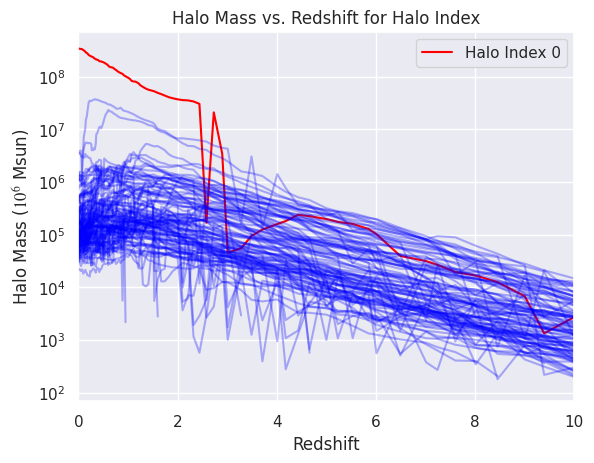

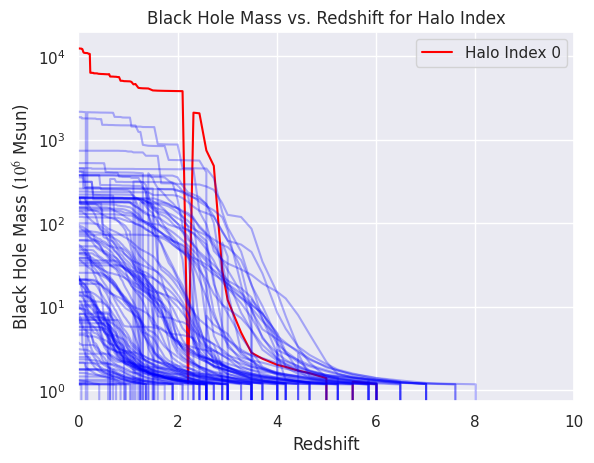

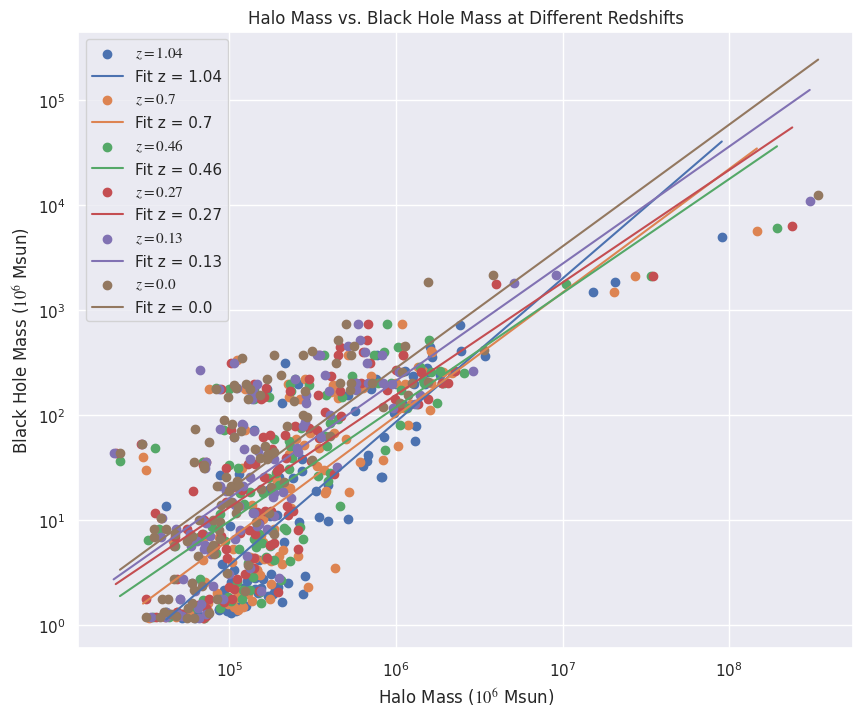

In [ ]:
# prompt: with the above data frame, make a plot of the halo mass as a function of the redshift/cosmic time. And then make a plot of black hole mass as a function of the redshift/cosmic time. Then I want you to plot the relationship between halo mass and black hole mass with respect to different redshifts
if not generate:
    # Disable LaTeX rendering
    plt.rcParams['text.usetex'] = False

    # Ensure 'HaloIndex' is a column in 'combined_df'
    unique_halo_indices = combined_df['Halo_Index'].unique()
    print(unique_halo_indices)

    # Plot halo mass as a function of redshift for each unique halo index

    plt.figure()
    for i in range(len(unique_halo_indices)):
        subset = combined_df[combined_df['Halo_Index'] == unique_halo_indices[i]]
        if i == 0:
            plt.plot(subset['Redshift'], subset['SubhaloMass'], linestyle='-', color = 'red', label=f'Halo Index {unique_halo_indices[i]}')
        else:
            plt.plot(subset['Redshift'], subset['SubhaloMass'], linestyle='-', color = 'blue', alpha = 0.3)#, label=f'Halo Index {unique_halo_indices[i]}')
    plt.xlabel('Redshift')
    plt.ylabel('Halo Mass ($10^{6}$ Msun)')
    plt.title(f'Halo Mass vs. Redshift for Halo Index')
    #plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0,15)
    plt.grid(True)
    plt.legend()

    plt.xlim(0,10)
    plt.savefig('/content/drive/MyDrive/BHData/halomass_vs_redshift.pdf')
    plt.show()
    plt.close()


    plt.figure()
    # Plot black hole mass as a function of redshift for each unique halo index
    for i in range(len(unique_halo_indices)):
        subset = combined_df[combined_df['Halo_Index'] == unique_halo_indices[i]]
        #plt.plot(subset['Redshift'], subset['SubhaloBHMass'], linestyle='-', label=f'Halo Index {index}')
        if i == 0:
            #plt.plot(subset['Redshift'], subset['SubhaloMassType5'], linestyle='-', color = 'red', label=f'Halo Index {unique_halo_indices[i]}')
            plt.plot(subset['Redshift'], subset['SubhaloBHMass'], linestyle='-', color = 'red', label=f'Halo Index {unique_halo_indices[i]}')
        else:
            #plt.plot(subset['Redshift'], subset['SubhaloMassType5'], linestyle='-', color = 'blue', alpha = 0.3, label=f'Halo Index {unique_halo_indices[i]}')
            plt.plot(subset['Redshift'], subset['SubhaloBHMass'], linestyle='-', color = 'blue', alpha = 0.3)#, label=f'Halo Index {unique_halo_indices[i]}')
    plt.xlabel('Redshift')
    plt.ylabel('Black Hole Mass ($10^{6}$ Msun)')
    plt.title(f'Black Hole Mass vs. Redshift for Halo Index')
    #plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0,10)
    plt.grid(True)
    plt.legend()
    plt.savefig('/content/drive/MyDrive/BHData/BHmass_vs_redshift.pdf')
    plt.show()
    plt.close()




    plt.figure(figsize=(10, 8))
    if 'z_list' not in globals():
        z_list = combined_df['Redshift'].unique()  # Define z_list if not previously defined

    for i in range(49, 100, 10):
        z = z_list[i]
        subset = combined_df[(combined_df['Redshift'] == z) & (combined_df['SubhaloMass'] > 0) & (combined_df['SubhaloBHMass'] > 0)]

        plt.scatter(subset['SubhaloMass'], subset['SubhaloBHMass'], label=f'$z = {z}$')


        # Fit a line to the log of the data
        if not subset.empty and len(subset['SubhaloMass']) > 1:  # Check if there's enough data to fit
            log_mass = np.log10(subset['SubhaloMass'])
            log_bh_mass = np.log10(subset['SubhaloBHMass'])
            coefficients = np.polyfit(log_mass, log_bh_mass, 1)
            poly = np.poly1d(coefficients)

            # Generate x values for the fitted line plot from the existing data range
            x_line = np.linspace(min(log_mass), max(log_mass), 100)
            y_line = poly(x_line)
            # Plot the fitted line
            plt.plot(10**x_line, 10**y_line, label=f'Fit z = {z}')

    plt.xlabel('Halo Mass ($10^{6}$ Msun)')
    plt.ylabel('Black Hole Mass ($10^{6}$ Msun)')
    plt.title('Halo Mass vs. Black Hole Mass at Different Redshifts')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.savefig('/content/drive/MyDrive/BHData/halomass_vs_BHmass.pdf')
    plt.show()
    plt.close()


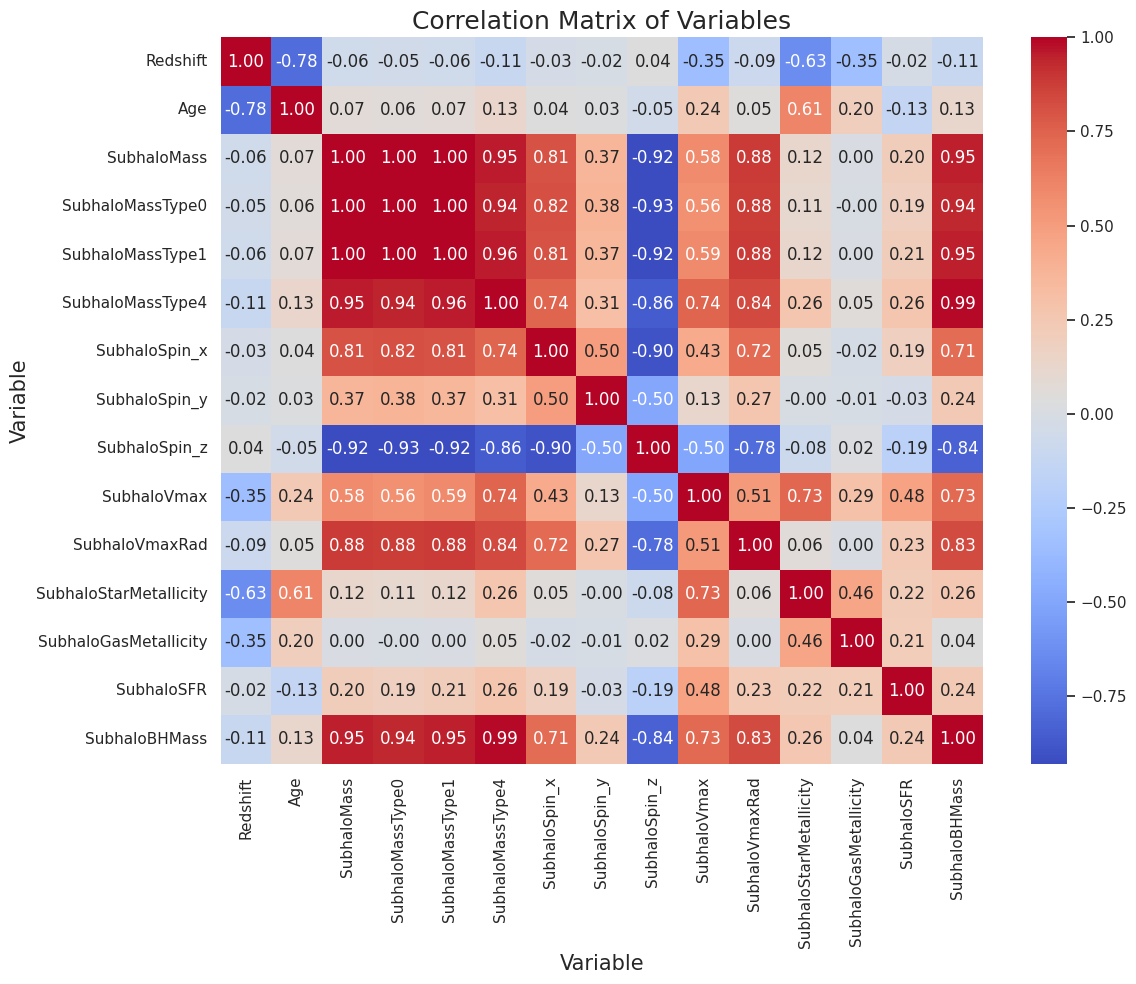

In [ ]:

import seaborn as sns

# Calculate the correlation matrix
if not generate:
    # Assuming 'HaloIndex' and 'Age' are the exact column names to exclude
    filtered_df = combined_df.drop(['Halo_Index', 'SubhaloMassType5' ], axis=1)
    #filtered_df = filtered_df.drop(['SubhaloMass', 'SubhaloMassType0', 'SubhaloMassType1', 'SubhaloMassType4',
    #                'SubhaloSpin_x', 'SubhaloSpin_y', 'SubhaloSpin_z','SubhaloSpin',
    #                'SubhaloVmax', 'SubhaloVmaxRad',
    #                'SubhaloStarMetallicity', 'SubhaloGasMetallicity',
    #                'SubhaloSFR', 'SubhaloBHMass'], axis = 1)
    #filtered_df = filtered_df.drop(filtered_df.columns[[0]], axis=1)

    # Calculate the correlation matrix


    corr_matrix = filtered_df.corr()

    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(12, 10), tight_layout=True)
    sns.set(font_scale=1)
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title('Correlation Matrix of Variables',fontsize = 18)
    plt.xlabel('Variable',fontsize = 15)
    plt.ylabel('Variable',fontsize = 15)
    plt.savefig('/content/drive/MyDrive/BHData/correlation_matrix.pdf')
    plt.show()

In [ ]:
# prompt: drop the unamed first column

df = df.drop(df.columns[[0]], axis=1)


In [ ]:
# prompt: for the first 250 entries within the df dataframe, only return me the indices when the  SubhaloBHMass column gives me 0, and save this list to a file in the drive

zero_bh_mass_indices = []
for i in range(250):
  if df.iloc[i]['SubhaloBHMass'] == 0:
    zero_bh_mass_indices.append(i)

print(zero_bh_mass_indices)
print(len(zero_bh_mass_indices))

with open("/content/drive/MyDrive/BHData/zero_bh_mass_indices.txt", "w") as f:
  for index in zero_bh_mass_indices:
    f.write(str(index) + "\n")


[17, 23, 35, 37, 47, 57, 60, 66, 67, 70, 75, 86, 88, 90, 92, 98, 99, 101, 107, 108, 111, 112, 113, 114, 116, 117, 120, 122, 123, 126, 129, 130, 131, 132, 133, 136, 138, 139, 140, 142, 144, 147, 148, 150, 151, 152, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 214, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 246, 247, 248, 249]
131


https://www.tng-project.org/data/docs/specifications/

In [ ]:
# prompt: write a code to also read the blackhole details data, as blackhole_details.hdf5, and output its header
rep = '/content/drive/MyDrive/BHData/'

with h5py.File(os.path.join(rep, 'blackhole_details.hdf5'), 'r') as f:
    # Print the header
    print(f.keys())
    print(f['cs'])
    print(f['time'])
    print(f)

<KeysViewHDF5 ['Header', 'cs', 'id', 'mass', 'mdot', 'rho', 'time', 'unique']>
<HDF5 dataset "cs": shape (195529001,), type "<f4">
<HDF5 dataset "time": shape (195529001,), type "<f4">
<HDF5 file "blackhole_details.hdf5" (mode r)>


In [ ]:
rep = '/content/drive/MyDrive/BHData/haloID.zip'

sn = 28
haloID_file_to_read = 'haloID_tng100-1_'+str(sn)+'th.npy'
# Open the zip file in read mode
with zipfile.ZipFile(rep, 'r') as zip_ref:
    # Read the file
    with zip_ref.open(haloID_file_to_read) as f:
        # Load the data frame
        haloID_df = np.load(f)

        print(haloID_df.dtype) # Print the header
        #print(haloID_df[:20, :]) # Print the header
        print(haloID_df.shape) # Print the header

tree_df = pd.DataFrame(haloID_df, columns=['SubhaloID', 'NextProgenitorID', 'FirstProgenitorID'])

#tree_df = tree_df.sort_values(by=['SubhaloID'])

print(tree_df.head(n = 50))
print(tree_df.tail(n = 50))

int64
(5765121, 3)
    SubhaloID  NextProgenitorID  FirstProgenitorID
0          71              6835                 72
1        6835             19878               6836
2       19878             27043              19879
3       27043             28868              27044
4       28868             29057              28869
5       29057             29149              29058
6       29149             29214              29150
7       29214             29258              29215
8       29258             29301              29259
9       29301             29335              29302
10      29335             29363              29336
11      29363             29456              29364
12      29456             29486              29457
13      29486             29546              29487
14      29589             29616              29590
15      29616             29662              29617
16      29662             29692              29663
17      29692             29746              29693
18      2974

In [ ]:
# prompt: now iterate over haloID files in reverse order from 99 to 1, for the first 300 entries in the file, return a list of halo index that gives me -1in the FirstProgenitorID column

import pandas as pd
import numpy as np
halo_index_list = []
for sn in range(99, 1, -1):
  rep = '/content/drive/MyDrive/BHData/haloID.zip'
  haloID_file_to_read = 'haloID_tng100-1_'+str(sn)+'th.npy'

  # Open the zip file in read mode
  with zipfile.ZipFile(rep, 'r') as zip_ref:
      # Read the file
      with zip_ref.open(haloID_file_to_read) as f:
          # Load the data frame
          haloID_df = np.load(f)

          # Create a pandas DataFrame from the data
          tree_df = pd.DataFrame(haloID_df, columns=['SubhaloID', 'NextProgenitorID', 'FirstProgenitorID'])

          # Sort the DataFrame by SubhaloID
          tree_df = tree_df.sort_values(by=['SubhaloID'])

          # Get the first 300 entries in the file
          tree_df_300 = tree_df.head(n=300)

          # Find the halo index that gives -1 in the FirstProgenitorID column
          halo_index = tree_df_300[tree_df_300['FirstProgenitorID'] == -1].index.tolist()

          # Append the halo index to the list
          halo_index_list.extend(halo_index)

print(halo_index_list)


[171, 181, 269, 186, 200, 202, 219, 220, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 230, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 232, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,

Redshift and Age for each snapshot (0 to 99)

How to read a hdf5 file

In [ ]:
i=0

f=h5py.File('/data/shared/IllustrisTNG/illustris/data/tng/tree_extended.{}.hdf5'.format(i),'r')
t=list(f.keys())

f.close()

t

['DescendantID',
 'FirstProgenitorID',
 'FirstSubhaloInFOFGroupID',
 'GroupBHMass',
 'GroupBHMdot',
 'GroupCM',
 'GroupFirstSub',
 'GroupGasMetalFractions',
 'GroupGasMetallicity',
 'GroupLen',
 'GroupLenType',
 'GroupMass',
 'GroupMassType',
 'GroupNsubs',
 'GroupPos',
 'GroupSFR',
 'GroupStarMetalFractions',
 'GroupStarMetallicity',
 'GroupVel',
 'GroupWindMass',
 'Group_M_Crit200',
 'Group_M_Crit500',
 'Group_M_Mean200',
 'Group_M_TopHat200',
 'Group_R_Crit200',
 'Group_R_Crit500',
 'Group_R_Mean200',
 'Group_R_TopHat200',
 'LastProgenitorID',
 'MainLeafProgenitorID',
 'Mass',
 'MassHistory',
 'NextProgenitorID',
 'NextSubhaloInFOFGroupID',
 'NumParticles',
 'RootDescendantID',
 'SnapNum',
 'SubfindID',
 'SubhaloBHMass',
 'SubhaloBHMdot',
 'SubhaloBfldDisk',
 'SubhaloBfldHalo',
 'SubhaloCM',
 'SubhaloGasMetalFractions',
 'SubhaloGasMetalFractionsHalfRad',
 'SubhaloGasMetalFractionsMaxRad',
 'SubhaloGasMetalFractionsSfr',
 'SubhaloGasMetalFractionsSfrWeighted',
 'SubhaloGasMetallicit

How to read SubLink data

In [ ]:
for j in [99]: #range(100):
    mass = np.zeros((1,1))

    for i in range(20):
        with h5py.File("/data/shared/IllustrisTNG/illustris/data/tng/tree_extended.{}.hdf5".format(i), 'r') as f:
            snap = np.array(f['SnapNum'])
            index=np.where(snap==j)[0]

            mass_t=np.array(f['SubhaloMass'])[index]*1e10/h
            print(mass_t.shape)
            mass_t=mass_t[:,np.newaxis]
            mass = np.r_[mass, mass_t]


    mass=mass[1:,:]
    print(mass.shape)
    np.save("./m_halo_tng100-1_"+str(j)+"th", mass)

(139392,)
(107065,)
(83729,)
(134791,)
(136931,)
(138883,)
(139089,)
(137038,)
(137592,)
(145021,)
(160816,)
(190433,)
(228089,)
(253521,)
(292078,)
(327000,)
(372633,)
(488416,)
(488276,)
(260854,)
(4361647, 1)


(array([2.290000e+02, 2.987422e+06, 1.051274e+06, 2.464200e+05,
        5.755400e+04, 1.460900e+04, 3.361000e+03, 6.310000e+02,
        1.270000e+02, 2.000000e+01]),
 array([ 7.43275142,  8.15029016,  8.86782891,  9.58536766, 10.30290641,
        11.02044516, 11.73798391, 12.45552266, 13.17306141, 13.89060016,
        14.6081389 ]),
 <a list of 10 Patch objects>)

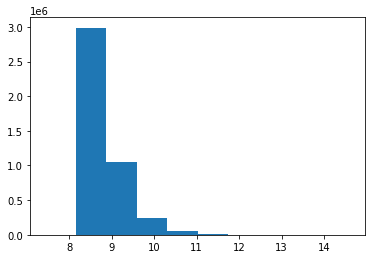

In [ ]:
plt.hist(np.log10(mass))

In [ ]:
for j in [99]: #range(100):
    pos = np.zeros((1,3))

    for i in range(20):
        with h5py.File("/data/shared/IllustrisTNG/illustris/data/tng/tree_extended.{}.hdf5".format(i), 'r') as f:
            snap = np.array(f['SnapNum'])
            index=np.where(snap==j)[0]

            pos_t=np.array(f['SubhaloPos'])[index]/h/(1+z_list[j]) # kpc unit
            print(pos_t.shape)
            pos = np.r_[pos, pos_t]


    pos=pos[1:,:]
    print(pos.shape)
    np.save("./pos_halo_tng100-1_"+str(j)+"th", pos)

(139392, 3)
(107065, 3)
(83729, 3)
(134791, 3)
(136931, 3)
(138883, 3)
(139089, 3)
(137038, 3)
(137592, 3)
(145021, 3)
(160816, 3)
(190433, 3)
(228089, 3)
(253521, 3)
(292078, 3)
(327000, 3)
(372633, 3)
(488416, 3)
(488276, 3)
(260854, 3)
(4361647, 3)


In [ ]:
j=99
pos=np.load("./pos_halo_tng100-1_{}th.npy".format(99))

X=pos[:10000,:]
nbrs = NearestNeighbors(n_neighbors=100, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
i_halo=10

print(distances[i_halo,:])
print(indices[i_halo])

[  0.          45.14859499  85.36318233  92.38158712 111.23930565
 112.48543107 129.26624336 134.4501667  137.00486362 139.62822739
 142.3096268  142.99411395 146.29023281 146.72297569 149.37175669
 150.46584746 152.55941751 158.39823482 159.28197543 159.35497524
 159.73352273 160.12629503 161.50094921 161.5447273  162.84135009
 164.02249002 165.03726063 166.09775029 166.50132454 170.20541906
 170.30612965 170.89886179 171.8750918  176.44480176 176.50367417
 182.16496381 183.65909014 184.02122244 185.13768912 187.62836395
 189.99894996 192.58232509 194.20513768 194.51032032 197.99783749
 200.66842119 201.13203551 206.85193208 207.40483872 207.45735382
 207.56045236 211.27805713 212.80989504 215.93260275 217.40982643
 222.38058772 225.60568883 225.7725243  229.18259491 230.62897294
 235.34512187 238.19796912 247.44552279 247.72432994 247.93511066
 250.84192631 253.06085825 253.19257267 254.6504174  255.44195609
 255.80938694 256.55593902 257.71281993 260.64857297 261.19969579
 262.60352

In [ ]:
i_halo=indices[i_halo]
print(pos[i_halo,:])

[[16790.00390625 74593.5703125  70649.0703125 ]
 [16795.91796875 74549.6328125  70640.53125   ]
 [16748.36914062 74664.7265625  70671.2109375 ]
 [16804.47851562 74673.8203125  70692.484375  ]
 [16822.8828125  74677.4609375  70714.3046875 ]
 [16739.25976562 74494.4921875  70665.2421875 ]
 [16667.109375   74633.3515625  70644.15625   ]
 [16770.70117188 74517.7421875  70539.734375  ]
 [16843.3828125  74719.         70635.34375   ]
 [16731.9609375  74707.9140625  70704.3203125 ]
 [16926.13476562 74627.9140625  70672.328125  ]
 [16738.65039062 74477.4453125  70583.3046875 ]
 [16887.29296875 74552.359375   70750.25      ]
 [16662.72070312 74551.03125    70708.375     ]
 [16731.77148438 74592.2421875  70786.6171875 ]
 [16924.91015625 74560.109375   70706.6953125 ]
 [16905.3046875  74653.7578125  70569.3359375 ]
 [16779.41796875 74714.0546875  70546.7890625 ]
 [16798.359375   74570.4609375  70806.4453125 ]
 [16713.6328125  74673.375      70534.2109375 ]
 [16866.74023438 74607.1171875  70788.50

In [ ]:
mass[i_halo]

array([[5.37905824e+11],
       [3.06001568e+08],
       [6.26930112e+08],
       [1.56732528e+08],
       [8.06052864e+08],
       [3.65709184e+08],
       [8.56268160e+08],
       [7.77655168e+08],
       [1.71659424e+08],
       [1.56732528e+08],
       [6.71710784e+08],
       [6.94101120e+08],
       [3.28391936e+08],
       [9.40395072e+08],
       [5.74685824e+08],
       [2.16440128e+08],
       [4.61915904e+09],
       [2.38830496e+08],
       [2.68684320e+08],
       [9.47858496e+08],
       [8.28911206e+10],
       [1.18781427e+09],
       [5.82149312e+08],
       [1.71659424e+08],
       [1.64195968e+08],
       [1.79122864e+08],
       [3.20168243e+09],
       [1.49269056e+08],
       [2.91074656e+08],
       [9.18004736e+08],
       [6.28056576e+08],
       [3.65709184e+08],
       [4.10489888e+08],
       [2.76147776e+08],
       [6.26930112e+08],
       [3.88099552e+08],
       [1.56732528e+08],
       [9.34961472e+08],
       [4.85124384e+08],
       [9.04811008e+08],


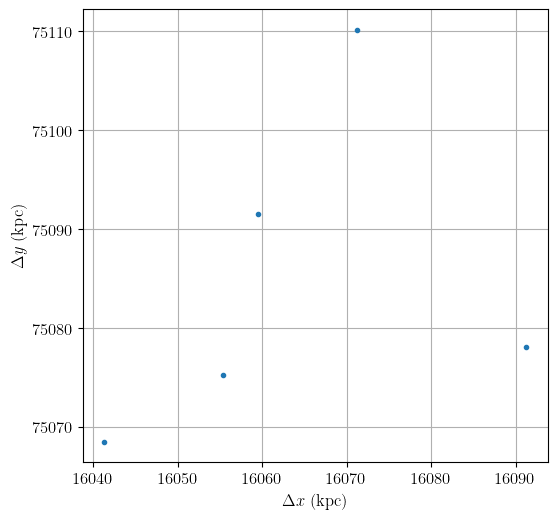

In [ ]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)


ax1.plot(pos[i_halo,0], pos[i_halo,1], '.')


ax1.set_xlabel(r'$\Delta x$ (kpc)')
ax1.set_ylabel(r'$\Delta y$ (kpc)')


#ax1.set_xlim(0,3e4)
#ax1.set_ylim(1e1, 4e8)


#ax1.legend(loc=2)
#ax2.legend(loc=1)

ax1.grid()

In [ ]:
print("{:.2e}".format(3.45456457))

3.45e+00
